<a href="https://colab.research.google.com/github/swapnilkhartode/LGMVIP-Data-Science/blob/README/Advanced%20Level%20Tasks/Task%3A%201_Develop_a_Neutral_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LetsGrowMore Virtual Internship Program (November-2021)**

**Advanced Level Task**

Name:- Swapnil Ramesh Khartode

Task1:
 Develop a Neutral Network That Can Read Handwriting

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from numpy import unique, argmax
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import datasets

In [ ]:
##Loading the MNIST Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


In [ ]:
#Normalization
X_train=X_train/255
X_test=X_test/255

In [ ]:
##Reshaping the training and test datasets
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
## Training model using CNN
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 36s 294ms/step - loss: 0.4981 - accuracy: 0.8693
Epoch 2/10
118/118 [==============================] - 34s 292ms/step - loss: 0.1049 - accuracy: 0.9686
Epoch 3/10
118/118 [==============================] - 35s 294ms/step - loss: 0.0704 - accuracy: 0.9790
Epoch 4/10
118/118 [==============================] - 34s 292ms/step - loss: 0.0546 - accuracy: 0.9833
Epoch 5/10
118/118 [==============================] - 35s 293ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 6/10
118/118 [==============================] - 35s 293ms/step - loss: 0.0405 - accuracy: 0.9876
Epoch 7/10
118/118 [==============================] - 35s 297ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 8/10
118/118 [==============================] - 35s 294ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 9/10
118/118 [==============================] - 34s 290ms/step - loss: 0.0267 - accuracy: 0.9921
Epoch 10/10
118/118 [==============================] - 34s 290ms/step - l

In [ ]:
#Model Comiled Successfully, Now Testing
model.evaluate(X_test,y_test,verbose=5)

[0.03912752866744995, 0.9868999719619751]

In [ ]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533684, 0.08533683, 0.08533708, 0.08533713, 0.08533683,
        0.08533683, 0.08533683, 0.23196793, 0.08533683, 0.08533685],
       [0.0853368 , 0.08533714, 0.23196849, 0.0853368 , 0.0853368 ,
        0.0853368 , 0.0853368 , 0.0853368 , 0.0853368 , 0.0853368 ],
       [0.08533986, 0.23194873, 0.08533871, 0.08533806, 0.08534023,
        0.08533818, 0.08533831, 0.08534092, 0.08533899, 0.08533808],
       [0.23196772, 0.08533685, 0.08533687, 0.08533685, 0.08533685,
        0.08533685, 0.08533745, 0.08533686, 0.08533685, 0.08533688],
       [0.08534715, 0.08534715, 0.08534721, 0.08534718, 0.23180461,
        0.08534715, 0.08534716, 0.08534831, 0.08534725, 0.0854168 ]],
      dtype=float32)>

In [ ]:
Y_pred=[]
pred=model.predict(X_test)
for element in pred:
    Y_pred.append(np.argmax(element))

In [ ]:
Y_pred=np.array(Y_pred)
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
cm

array([[ 974,    0,    1,    1,    0,    0,    1,    2,    1,    0],
       [   0, 1131,    1,    1,    0,    0,    1,    1,    0,    0],
       [   1,    2, 1021,    1,    1,    0,    0,    5,    1,    0],
       [   0,    0,    0, 1007,    0,    3,    0,    0,    0,    0],
       [   1,    0,    0,    1,  964,    0,    2,    2,    1,   11],
       [   2,    0,    1,    7,    0,  879,    1,    0,    0,    2],
       [   8,    2,    0,    0,    2,   10,  935,    0,    1,    0],
       [   0,    2,    5,    5,    0,    0,    0, 1015,    0,    1],
       [   5,    0,    2,    5,    0,    3,    0,    2,  953,    4],
       [   2,    2,    2,    2,    2,    6,    0,    3,    0,  990]])

In [ ]:
X_test=X_test.reshape(10000,28,28)

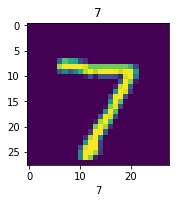

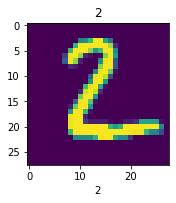

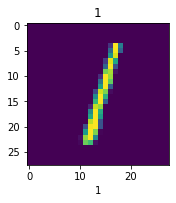

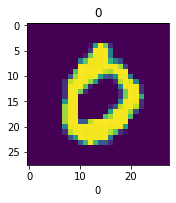

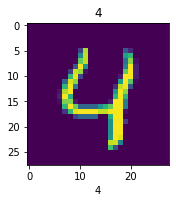

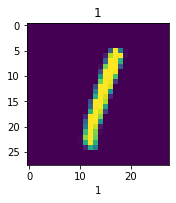

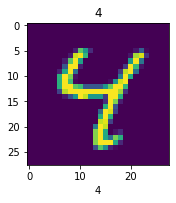

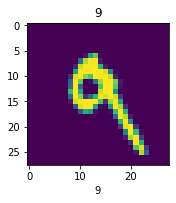

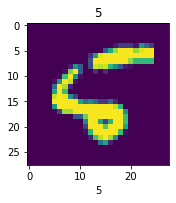

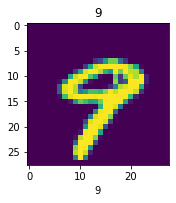

In [ ]:
for i in range(0,10):
    plt.figure(figsize=(30,30))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_pred[i])
    plt.title(y_test[i])

In [ ]:
actual=y_test
predicted=Y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


Text(114.0, 0.5, 'Actual')

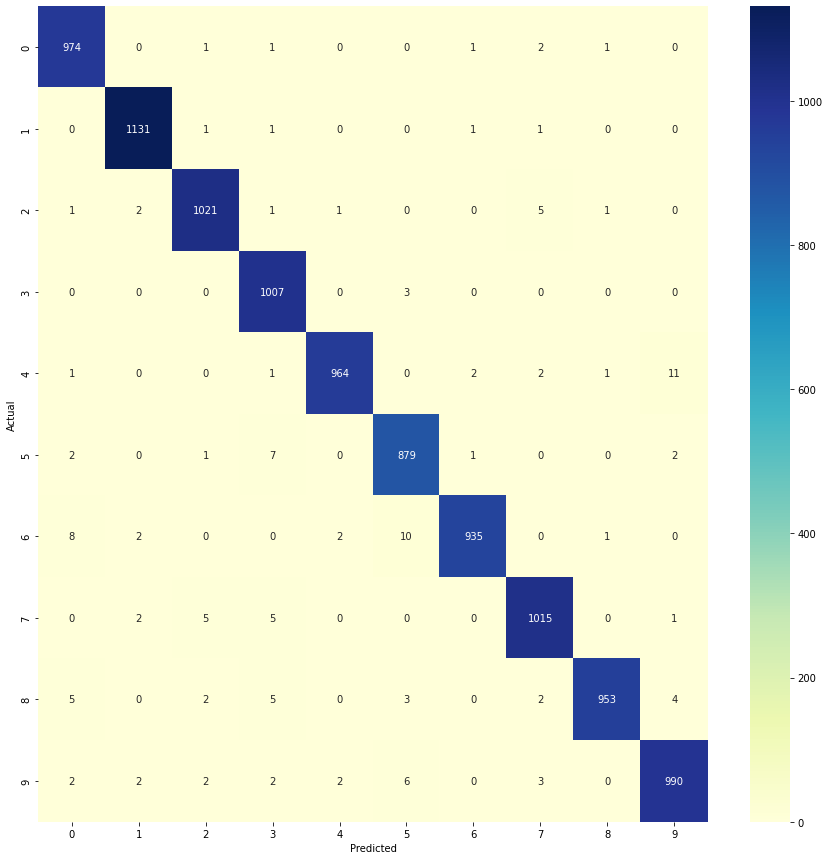

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,cmap="YlGnBu",annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')